# Ejercicio 1
Escriba todos los estados de la Cadena de Markov.

In [5]:
N=10
A=['o']*N
for i in range(N+1):
  print(f'Estado {i+1}: X_{len(A)}')
  print('\t ',A,'\n')
  if len(A) > 0:
    A.pop()

Estado 1: X_10
	  ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'] 

Estado 2: X_9
	  ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'] 

Estado 3: X_8
	  ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'] 

Estado 4: X_7
	  ['o', 'o', 'o', 'o', 'o', 'o', 'o'] 

Estado 5: X_6
	  ['o', 'o', 'o', 'o', 'o', 'o'] 

Estado 6: X_5
	  ['o', 'o', 'o', 'o', 'o'] 

Estado 7: X_4
	  ['o', 'o', 'o', 'o'] 

Estado 8: X_3
	  ['o', 'o', 'o'] 

Estado 9: X_2
	  ['o', 'o'] 

Estado 10: X_1
	  ['o'] 

Estado 11: X_0
	  [] 



# Ejercicio 2

Escriba la matriz de transición (y explique claramente de d\'onde viene la
expresi\'on).

Si tenemos $N=10$:

- $P_{0,1} = 1$
- $P_{10,9} = 1$
- Para $i=1,\ldots,9$:
$$P_{i,j} \begin{cases}  (10-i)/10 & \text{si } j=i+1, \\  i/10 & \text{si } j=i-1, \\ 0 & \text{en otro caso} \end{cases}$$

Por lo que nos queda la siguiente matriz de transición: 

$$
P = \begin{pmatrix} 
0 & 1 & 0 & 0 & 0 &
   0 & 0 & 0 & 0 & 0 &
   0  \\
  0.0909 & 0 & 0.9091 & 0 & 0 &
   0 & 0 & 0 & 0 & 0 &
   0  \\
  0 & 0.1818& 0 & 0.8182& 0 &
   0 & 0 & 0 & 0 & 0 &
   0  \\
  0 & 0 & 0.273& 0 & 0.7273&
   0 & 0 & 0 & 0 & 0 &
   0  \\
  0 & 0 & 0 & 0.3636& 0 &
   0.6364& 0 & 0 & 0 & 0 &
   0  \\
  0 & 0 & 0 & 0 & 0.4545&
   0 & 0.5455& 0 & 0 & 0 &
   0  \\
  0 & 0 & 0 & 0 & 0 &
   0.5455& 0 & 0.4545& 0 & 0 &
   0  \\
  0 & 0 & 0 & 0 & 0 &
   0 & 0.6364& 0 & 0.3636& 0 &
   0  \\
  0 & 0 & 0 & 0 & 0 &
   0 & 0 & 0.7273& 0 & 0.273&
   0  \\
  0 & 0 & 0 & 0 & 0 &
   0 & 0 & 0 & 0.8182& 0 &
   0.1818\\
  0 & 0 & 0 & 0 & 0 &
   0 & 0 & 0 & 0 & 1 &
   0           
\end{pmatrix}
$$



Dado que el estado S representa la cantidad de bolas en la urna A, se tienen las siguientes probabilidades:

- $P_{01}= 1$. Esta corresponde al estado donde $A$ est\'a vacia entonces la unica trancision posible es que una bola de $B$ pase a $A$.
- $P_{NN-1}=1$. Esta probabilidad corresponde al estado donde $A$ tiene todas las bolsas y lo unico posible es que le pase una a la urna $B$.
- $P_{ij}$. Esta probabilidad tiene 3 casos para $i,j \in \{1,2,\dots,n-1\}$:

  1. Si $j=i+1 \rightarrow P_{ij}= (N-i)/N$ corresponde al estado

  2. Si $ j=i-1 \rightarrow P_{ij}= (i)/N$

  3. 0 a.o.c.

# Ejercicio 3 

A partir de este ejercicio elige un $N$ y dejalo fijo. Haga un programa que simule y grafique la trayectoria del proceso: Empieza inicialmente con una distribuci\'on inicial $π_0$, y simula la trayectoria $X_0, X_1, ...X_n$ hasta un
tiempo $n$ dado por el usuario.

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#A partir de este ejercicio elige un  N  y d'ejalo fijo.
#Haga un programa que simule y grafique la trayectoria del proceso:
# Empieza inicialmente con una distribuci'on inicial  π0 
#, y simula la trayectoria  X0,X1,...Xn  hasta un tiempo  n  dado por el usuario.
def all_equal(pi_0):
    for i in range(1,len(pi_0)):
        if pi_0[i-1] != pi_0[i]:
            return False
    return True

def initial_state(pi_0):
  coin_toss = np.random.uniform(0,1)
  if all_equal(pi_0):
    initial_state = np.random.randint(0,high=len(pi_0))
  else:
    next = []
    for i in range(len(pi_0)):
      if coin_toss < pi_0[i]:
        next.append(pi_0[i]-coin_toss)
      else:
        next.append(2)
    initial_state = np.argmin(next)

  return initial_state

#Params: n, numero de bolitas
def matrix_trans(n):
  n+=1
  matriz = np.zeros(shape=(n,n))
  for i in range(n):
      for j in range(n):
          if i == 0 and j == 1:
              matriz[i,j] = 1
          else:
              if j == i+1:
                  matriz[i,j] = (n-i) / n
              elif j == i-1:
                  matriz[i,j] = i/n
              else:
                  matriz[i,j] = 0
  matriz[n-1,n-2]=1
  return matriz

def the_matrix(initial_state, matrix_trans, time=100 ,S_n=0, stop_condition = 'Time'):
  n = matrix_trans.shape[0]
  if initial_state > n or initial_state < 0: return 'El estado inicial no es posible para este evento.'
  steps = [initial_state]
  iter = 0
  if stop_condition == 'Time':
    while iter < time:
      iter += 1
      forward_steps = matrix_trans[initial_state]
      coin_toss = random.uniform(0,1)

      next = []
      for j in range(len(forward_steps)):
        if forward_steps[j] > coin_toss:
          next.append(forward_steps[j] - coin_toss)
        else:
          next.append(2)

      if coin_toss > max(forward_steps):
        initial_state = np.argmax(forward_steps)
    
      elif max(forward_steps) == 0.5:
        idxs = [i for i, x in enumerate(probs) if x == 0.5]
        toss = random.uniform(0,1)
        if toss < 0.5:
          initial_state = idxs[0]
        else:
          initial_state = idxs[1]
      else:
        initial_state = np.argmin(next)

      steps.append(initial_state)
  elif stop_condition == 'State':
    while initial_state != S_n:
      iter += 1
      forward_steps = matrix_trans[initial_state]
      coin_toss = random.uniform(0,1)

      next = []
      for j in range(len(forward_steps)):
        if forward_steps[j] > coin_toss:
          next.append(forward_steps[j] - coin_toss)
        else:
          next.append(2)

      if coin_toss > max(forward_steps):
        initial_state = np.argmax(forward_steps)
    
      elif max(forward_steps) == 0.5:
        idxs = [i for i, x in enumerate(probs) if x == 0.5]
        toss = random.uniform(0,1)
        if toss < 0.5:
          initial_state = idxs[0]
        else:
          initial_state = idxs[1]
      else:
        initial_state = np.argmin(next)

      steps.append(initial_state)
  else:
    raise Exception('Las condiciones de paro son "Time" y "State"') 
  return steps, iter

def view_time(n,initial_distro,times):
  x = range(times+1)
  transitions = matrix_trans(n)
  initial_state_ = initial_state(initial_distro)
  trayectory = the_matrix(initial_state_,transitions,times)
  plt.plot(x,trayectory[0])
  plt.xlabel('Tiempo')
  plt.ylabel('Trayectoria')
  plt.title('Urna de Ehrenfest')
  plt.grid()
  plt.show()

In [8]:
matrix_trans(10)

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.        , 0.90909091, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.18181818, 0.        , 0.81818182, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.27272727, 0.        , 0.72727273,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.36363636, 0.        ,
        0.63636364, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.45454545,
        0.        , 0.54545455, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.

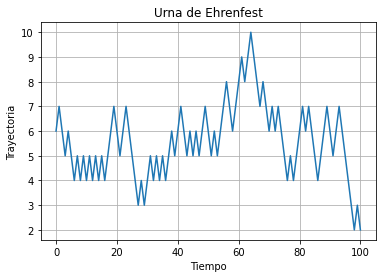

In [9]:
pi_0 = [1/11]*11
view_time(10,pi_0,100)

# Ejercicio 4

Haga otro programa que simule la trayectoria del proceso: Empieza inicialmente con una distribución inicial $\pi_0$, y simula la trayectoria $X_0,X_1,\ldots,X_T$hasta un tiempo aleatorioT, definido como la primera vez que el procesotoma el estado fijoi0(el estadoi0esta dado por el usuario). ́Usalo paracontestar lo siguiente


In [10]:
def grlzd_view_time(n,initial_, time=100, Sn=0, stop_condition='Time',view_ = True):
  transitions = matrix_trans(n)
  if type(initial_) == int:
    initial_state_ = initial_
  else:
    initial_state_ = initial_state(initial_)

  if stop_condition == 'Time':
    aux = the_matrix(initial_state_,transitions,time,0,'Time')

  elif stop_condition == 'State':
    aux = the_matrix(initial_state_,transitions,time,Sn,'State')

  trayectory = aux[0]
  x = range(aux[1] + 1)
  if view_ == True:
    print(len(trayectory))
    plt.plot(x,trayectory)
    plt.xlabel('Tiempo')
    plt.ylabel('Trayectoria')
    plt.title('Urna de Ehrenfest')
    plt.grid()
    plt.show()
  else: 
    pass
  return trayectory

101


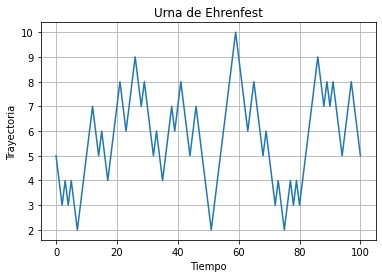

2


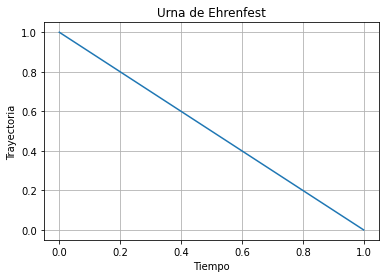

In [11]:

pi_0 = [1/11]*11
grlzd_view_time(10,pi_0)
tray = grlzd_view_time(10,pi_0,stop_condition="State")

# Ejercicio 5

Dado que el proceso empezo en $0$, ¿Cuánto tarda en promedio en llegar al estado $\left\lfloor \frac{N}{2} \right\rfloor$?

50.0
185


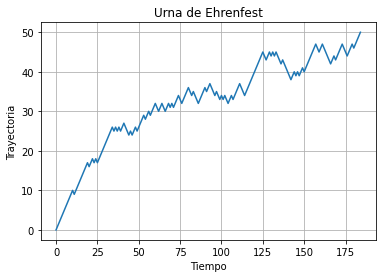

Promedio: 146.116


In [12]:
N = 100
Sn = np.floor(N/2)
print(Sn)
iters = 500
times = []
grlzd_view_time(N,0,Sn=Sn,stop_condition="State")
for i in range(iters):
  trayectory = grlzd_view_time(N,0,Sn=Sn,stop_condition="State",view_=False)
  times.append(len(trayectory))
mean_ = np.mean(times)
print('Promedio:',mean_)

# Ejercicio 6
Dado que el proceso empezo en $0$, ¿Cuánto tarda en promedio en llegar al estado $N$?

127


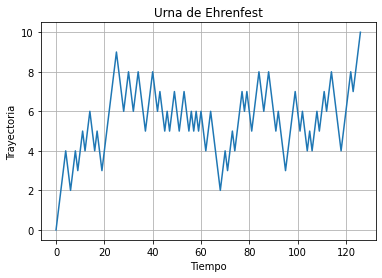

Tiempos por iteracion: [127, 105, 269, 297, 115, 69, 57, 433, 355]
Promedio: 276.528


In [22]:
N = 10
Sn = N
iters = 500
times = []
grlzd_view_time(N,0,Sn=Sn,stop_condition="State")
for i in range(iters):
  trayectory = grlzd_view_time(N,0,Sn=Sn,stop_condition="State",view_=False)
  times.append(len(trayectory))
print('Tiempos por iteracion:',times[1:10])
mean_ = np.mean(times)
print('Promedio:',mean_)

# Ejercio 7
Dado que el proceso empezo en $N$, ¿Cuánto tarda en promedio en llegar al estado $\left\lfloor \frac{N}{2} \right\rfloor$?

111


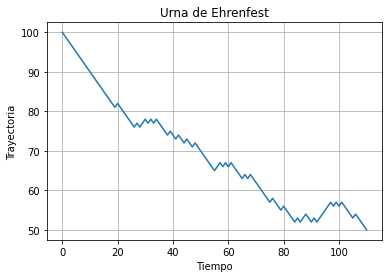

Tiempos por iteracion: [183, 115, 129, 159, 121, 183, 145, 185, 91]
Promedio: 152.456


In [14]:
N = 100
Sn = np.floor(N/2)
iters = 500
times = []
grlzd_view_time(N,N,Sn=Sn,stop_condition="State")
for i in range(iters):
  trayectory = grlzd_view_time(N,N,Sn=Sn,stop_condition="State",view_=False)
  times.append(len(trayectory))
print('Tiempos por iteracion:',times[1:10])
mean_ = np.mean(times)
print('Promedio:',mean_)

# Ejercicio 8
Dado que el proceso empezo en $N$, ¿Cuánto tarda en promedio en llegar al estado $0$?

657


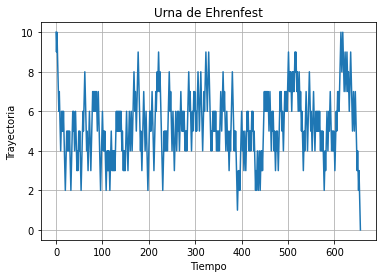

KeyboardInterrupt: 

In [15]:
N = 10
iters = 500
times = []
grlzd_view_time(N,N,Sn=0,stop_condition="State")
for i in range(iters):
  trayectory = grlzd_view_time(N,N,Sn=0,stop_condition="State",view_=False)
  times.append(len(trayectory))
print('Tiempos por iteracion:',times[1:10])
mean_ = np.mean(times)
print('Promedio:',mean_)

# Ejercicio 9 
Dado $n$ muy grande, calcule la densidad de probabilidades de la variable aleatoria $X_n$ (aproxime por un histograma y después conjeture una densidad conocida con sus parámetros).

In [17]:
import scipy.stats as sts

In [18]:
def find_equilibrium(N=10,n=20,view_ = True):
  A = matrix_trans(N)
  AN = np.linalg.matrix_power(A,n)
  print(AN)
  x = list(range(N+1))

  plt.bar(x,AN[0])
  plt.bar(x,AN[1])

  plt.ylabel('P(X)')
  plt.xlabel('Xn')
  plt.title('Xn Dist.')

  plt.show()

[[3.02815249e-26 0.00000000e+00 1.06111595e-22 ... 1.02542552e-36
  0.00000000e+00 3.48487857e-41]
 [0.00000000e+00 2.13150123e-24 0.00000000e+00 ... 0.00000000e+00
  3.04930326e-38 0.00000000e+00]
 [2.10121971e-26 0.00000000e+00 7.45348563e-23 ... 9.26939662e-36
  0.00000000e+00 6.09512163e-40]
 ...
 [6.15316844e-42 0.00000000e+00 2.80890807e-37 ... 1.72648991e-21
  0.00000000e+00 1.46310278e-24]
 [0.00000000e+00 6.09860651e-40 0.00000000e+00 ... 0.00000000e+00
  7.45150899e-23 0.00000000e+00]
 [3.48487857e-43 0.00000000e+00 3.07803642e-38 ... 2.43826078e-21
  0.00000000e+00 2.09150239e-24]]


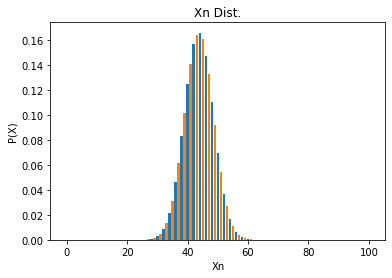

In [20]:
find_equilibrium(N=100, n=100)

# Ejercicio 10 
¿Que observas en los resultados de las preguntas 5-8?